# Import resources

In [1]:
import cv2
import helpers
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# Training and Testing Data

In [2]:
# Image data directories
image_dir_training = "day_night_images/training/"
image_dir_test = "day_night_images/test/"

# Load the Datasets

In [3]:
# Load training data
IMAGE_LIST = helpers.load_dataset(image_dir_training)

# Visualize the Input Images

In [27]:
# Select an image and its label by list index
image_index = 20
selected_image = IMAGE_LIST[image_index][0]
selected_label = IMAGE_LIST[image_index][1]
print("shape of the image : " + str(selected_image.shape))
print("label" + str(selected_label))

shape of the image : (737, 1024, 3)
labelday


# Preprocess the Data

In [50]:
def standardize_input(image):
    standard_im = cv2.resize(image , (1100 , 600))
    
    return standard_im

In [51]:
def encode(label):
    if(label == 'day'):
        numerical_val = 1
    if(label == 'night'):
        numerical_val = 0
        
    return numerical_val

In [52]:
def standardize(image_list):
    
    # Empty image data array
    standard_list = []

    # Iterate through all the image-label pairs
    for item in image_list:
        image = item[0]
        label = item[1]

        # Standardize the image
        standardized_im = standardize_input(image)

        # Create a numerical label
        binary_label = encode(label)    

        # Append the image, and it's one hot encoded label to the full, processed list of image data 
        standard_list.append((standardized_im, binary_label))
        
    return standard_list

# Standardize all training images
STANDARDIZED_LIST = standardize(IMAGE_LIST)

# Visualizing the standardized data

shape: (600, 1100, 3)
label :1


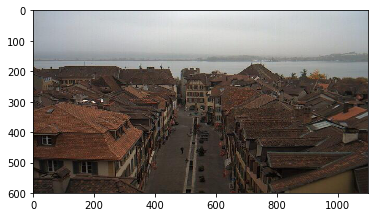

In [61]:
image_num = 66
selected_image = STANDARDIZED_LIST[image_num][0]
selected_label = STANDARDIZED_LIST[image_num][1]

plt.imshow(selected_image)
print("shape: " + str(selected_image.shape))
print("label :" + str(selected_label))

# Feature Extraction

### RGB to HSV conversion

label:1


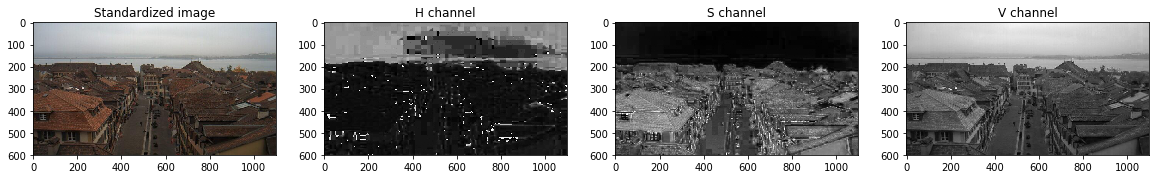

In [62]:
image_num = 66
test_im = STANDARDIZED_LIST[image_num][0]
test_label = STANDARDIZED_LIST[image_num][1]

# Convert to HSV
hsv = cv2.cvtColor(test_im , cv2.COLOR_RGB2HSV)

# Print image label
print("label:" + str(test_label))

# HSV channels
h = hsv[: , : , 0]
s = hsv[: , : , 1]
v = hsv[: , : , 2]

#plot the original image and the three channels
f , (ax1 , ax2 , ax3 , ax4) = plt.subplots(1 , 4 , figsize = (20 , 10))
ax1.set_title('Standardized image')
ax1.imshow(test_im)
ax2.set_title('H channel')
ax2.imshow(h, cmap='gray')
ax3.set_title('S channel')
ax3.imshow(s, cmap='gray')
ax4.set_title('V channel')
ax4.imshow(v, cmap='gray')

### Finding the avg. brightness using the V channel

In [66]:
def avg_brightness(rgb_image):
    # Convert image to HSV
    hsv = cv2.cvtColor(rgb_image , cv2.COLOR_RGB2HSV)
    
    # Add up all the pixel values in the V channel
    sum_brightness = np.sum(hsv[: , : , 2])
    area = 600*1100
    
    #avg
    avg = sum_brightness/area
    
    return avg

avg brightness: 35.217


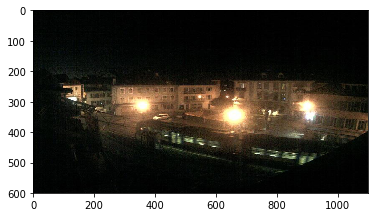

In [68]:
image_num = 190
test_im = STANDARDIZED_LIST[image_num][0]

avg = avg_brightness(test_im)
print('avg brightness: ' + str(avg))
plt.imshow(test_im)

avg brightness: 106.8313803030303


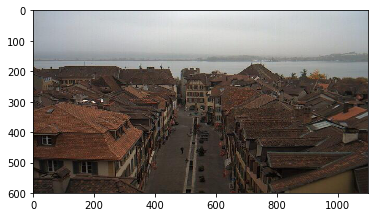

In [69]:
image_num = 66
test_im = STANDARDIZED_LIST[image_num][0]

avg = avg_brightness(test_im)
print('avg brightness: ' + str(avg))
plt.imshow(test_im)

# Classification and visualizing the error

### Build a complete classifier

In [70]:
def estimate_label(rgb_image):
    # Extract avg brightness features from an RGB image
    avg = avg_brightness(rgb_image)
    
    # Use the avg brightness features to predict a label (0 , 1)
    predicted_label = 0
    thershold = 120
    if(avg > threshold):
        predicted_label = 1
        
    return predicted_label

# Testing the classifier

### Test dataset

In [72]:
import random
# Load test data
TEST_IMAGE_LIST = helpers.load_dataset(image_dir_test)
# Standardize the test data
STANDARDIZED_TEST_LIST = helpers.standardize(TEST_IMAGE_LIST)
# Shuffle the standardized test data
random.shuffle(STANDARDIZED_TEST_LIST)

### Determine the accuracy

In [ ]:
# COnstruct a list of misclassified images given a list of test images and its labels
def get_misclassified_images(test_images):
    # Track the misclassifed images by placing them in lists
    misclassified_images_labels = []
    
    # Iterate through all the test images
    #classify each image and compare to the true label
    for image in test_images:
        
        # Get test images
        